In [1]:
function forward_diff(f, x, dx)
    return (f(x + dx) - f(x)) / dx
end

forward_diff (generic function with 1 method)

In [2]:
function backward_diff(f, x, dx)
    return (f(x) - f(x - dx)) / dx
end

backward_diff (generic function with 1 method)

In [3]:
function central_diff(f, x, dx)
    return (f(x + dx) - f(x - dx)) / (2 * dx)
end

central_diff (generic function with 1 method)

In [4]:
function solve_problem(x)
    return -0.1*(x^4)-0.15*(x^3)-0.5*(x^2)-0.25*x+1.2
end

solve_problem (generic function with 1 method)

In [5]:
function solve_problem_diff(x)
    return -0.4*(x^3)-0.45*(x^2)-x-0.25
end

solve_problem_diff (generic function with 1 method)

In [6]:
# X = 0.5
# H = 0.5
X = 1.25
H = 1.00

println("Calculate the first derivative of the function using the forward difference, backward difference, and central difference approximation using x = $X and h = $H")

Calculate the first derivative of the function using the forward difference, backward difference, and central difference approximation using x = 1.25 and h = 1.0


In [7]:
fd = forward_diff(solve_problem, X, H)

-5.734375

In [8]:
cd = central_diff(solve_problem, X, H)

-3.634375

In [9]:
bd = backward_diff(solve_problem, X, H)

-1.534375

In [10]:
exact = solve_problem_diff(X)

-2.984375

In [11]:
using Printf

println("\tForward differencing\t\t Central differencing\t\t Backward differencing")
@printf("%10g (error: %10.2g)\t%10g (error: %10.2g)\t%10g (error: %10.2g)\n", fd, abs(fd - exact), cd, abs(cd - exact), bd, abs(bd - exact))

	Forward differencing		 Central differencing		 Backward differencing
  -5.73438 (error:        2.8)	  -3.63437 (error:       0.65)	  -1.53438 (error:        1.4)


In [12]:
println("\tForward differencing\t\t Central differencing\t\t Backward differencing")

fd_errors = []
cd_errors = []
bd_errors = []
dx_all = []
dx = H

for i in 1:10
    fd = forward_diff(solve_problem, X, dx)
    cd = central_diff(solve_problem, X, dx)
    bd = backward_diff(solve_problem, X, dx)
    @printf("%10g (error: %10.2g)\t%10g (error: %10.2g)\t%10g (error: %10.2g)\n", fd, abs(fd - exact), cd, abs(cd - exact), bd, abs(bd - exact))
    append!(fd_errors, abs(fd - exact))
    append!(cd_errors, abs(cd - exact))
    append!(bd_errors, abs(bd - exact))
    append!(dx_all, dx)
    dx = dx / 2
end

	Forward differencing		 Central differencing		 Backward differencing
  -5.73438 (error:        2.8)	  -3.63437 (error:       0.65)	  -1.53438 (error:        1.4)
  -4.15938 (error:        1.2)	  -3.14688 (error:       0.16)	  -2.13437 (error:       0.85)
  -3.52656 (error:       0.54)	    -3.025 (error:      0.041)	  -2.52344 (error:       0.46)
  -3.24473 (error:       0.26)	  -2.99453 (error:       0.01)	  -2.74434 (error:       0.24)
  -3.11194 (error:       0.13)	  -2.98691 (error:     0.0025)	  -2.86189 (error:       0.12)
  -3.04751 (error:      0.063)	  -2.98501 (error:    0.00063)	  -2.92251 (error:      0.062)
  -3.01578 (error:      0.031)	  -2.98453 (error:    0.00016)	  -2.95328 (error:      0.031)
  -3.00004 (error:      0.016)	  -2.98441 (error:      4e-05)	  -2.96879 (error:      0.016)
   -2.9922 (error:     0.0078)	  -2.98438 (error:    9.9e-06)	  -2.97657 (error:     0.0078)
  -2.98828 (error:     0.0039)	  -2.98438 (error:    2.5e-06)	  -2.98047 (error:     0.0039)


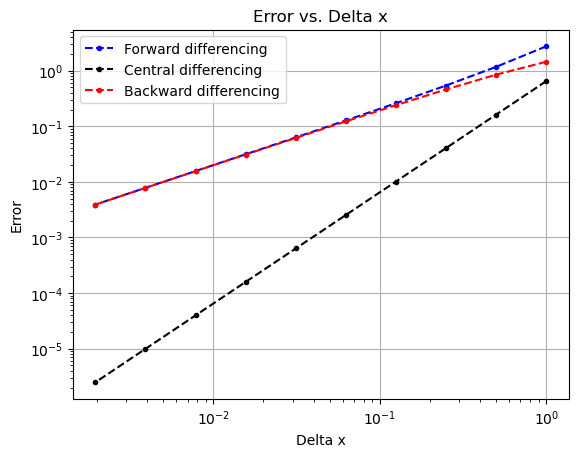

In [13]:
using PyPlot

n = length(dx_all)
loglog(dx_all, fd_errors, "b.--", label="Forward differencing")
loglog(dx_all, cd_errors, "k.--", label="Central differencing")
loglog(dx_all, bd_errors, "r.--", label="Backward differencing")

ylabel("Error")
xlabel("Delta x")
title("Error vs. Delta x")
legend(loc="best")
grid(true)